# **Unsupervised Learning**

Neste projeto vou utilizar dois metodos de Unsuprevised Learning: K-means e Apriori algorithms, e para cada um vou dar um problema unico com o tema geral ser vinho. 

# **K-Means Problema**

Utilizando o metodo K-means eu tive como objetivo descobrir "O que faz vinho ter qualidade" para improvar no futuro a vinheiras, e uma exploração de os seus quimicos e as suas diferenças relações. O dataset que utlizei foi "winequality-red.csv" , que inclui os varios quimicos existentos em vinho verde , e a sua respetiva nota de qualidade.

**Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


**Load do dataset e Remove Linhas com valores nulos**

In [2]:
#Load do dataset winequality-red.csv
file_path = '../wine_database/winequality-red.csv'
wine = pd.read_csv(file_path)

# Remove linhas com valores nulos
df_cleaned = wine.dropna()


**Elbow Method**

Utilizei o Elbow Method para Descobrir o numero ideal de clusters para utilizar neste dataset. O numero ideal para Clusters foi 3.

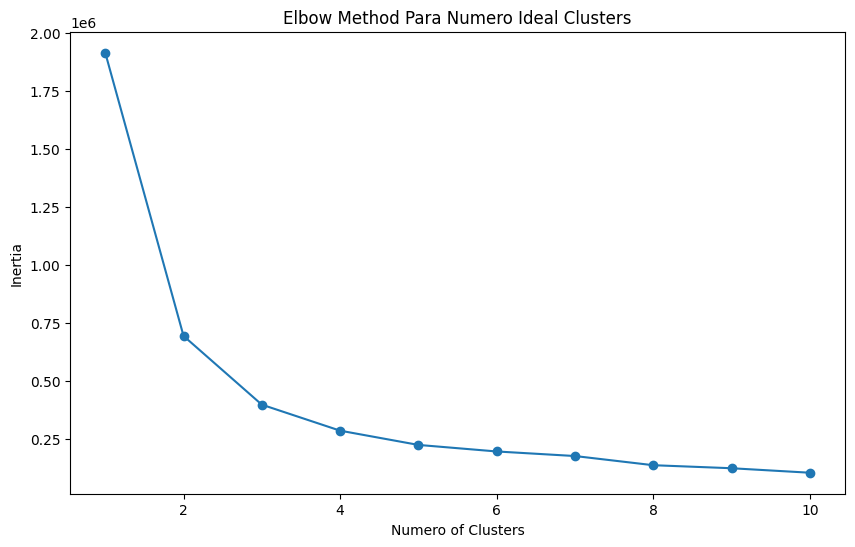

In [3]:
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init='auto')
    kmeans.fit(wine)
    inertia.append(kmeans.inertia_)

# Grafico para o Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method Para Numero Ideal Clusters')
plt.xlabel('Numero of Clusters')
plt.ylabel('Inertia')

plt.show()

**Aplica k-means clustering com 3 clusters (foi o ideal)**

Agora que tenho o numero ideal de clusters , apliquei o k-means algorithm , inseri na nova label 'cluster' as previsoes e demonstrei as Atribuicoes do cluster

In [4]:
# O Numero ideal foi 3
clusters = 3

# Aplica k-means clustering com 3 clusters
kmeans = KMeans(n_clusters=clusters, random_state=42,n_init='auto')
wine['cluster'] = kmeans.fit_predict(wine)

# Mostra as atribuições do cluster
print("Cluster Assignments:")
print(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',
         'alcohol', 'quality', 'cluster']])

Cluster Assignments:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      

**Calcule os valores médios para cada cluster (Quimicos)**

Aqui calculei os valores médios para cada cluster de só os quimicos e apresentei o num grafico de barras. Aqui é demonstrado que sulffur dioxide é o mais presente no vinho.

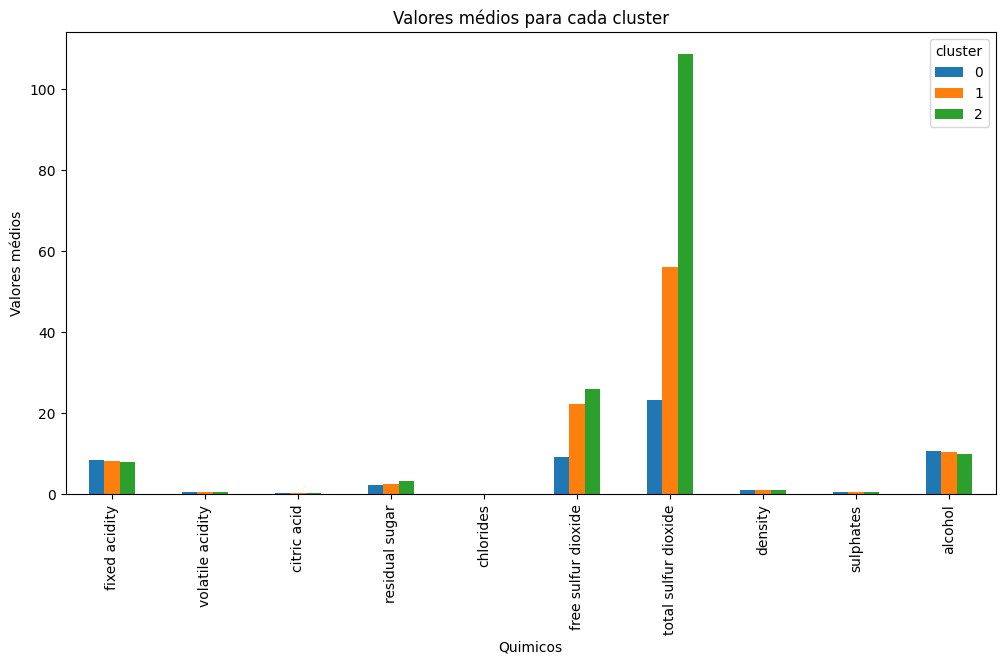

In [5]:
# Tira Qualidade e pH ja que nao é um quimico
winecopy = wine.drop(['quality', 'pH'], axis=1)

# Calcule os valores médios para cada cluster
clusterMedia = winecopy.groupby('cluster').mean()

# Grafico que mostra os valores médios para cada cluster
clusterMedia.transpose().plot(kind='bar', figsize=(12, 6))
plt.title('Valores médios para cada cluster')
plt.xlabel('Quimicos')
plt.ylabel('Valores médios')
plt.show()

**Categorização da qualidade para 'Low Quality,' 'Medium Quality,' e 'High Quality'**

Depois categorizei por as qualidades de cada vinho: Low Quality, Medium Quality e High Quality , com um grafico a demonstrar a sua quandidade de cada.


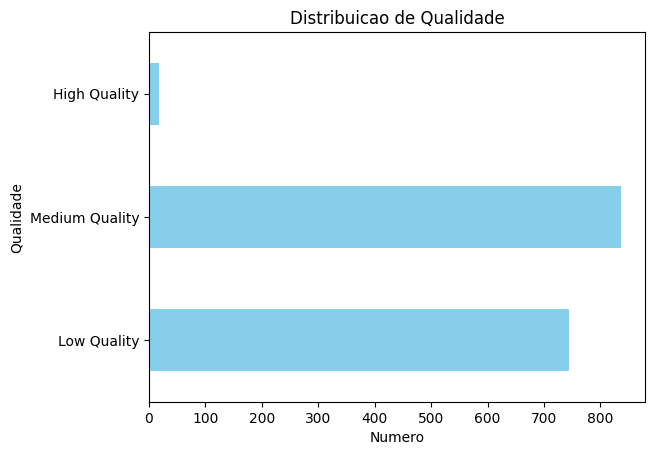

Distribuicao de Qualidade:
Low Quality    : 744
Medium Quality : 837
High Quality   : 18


In [6]:
# Categorização da 'quality' para 'Low Quality,' 'Medium Quality,' e 'High Quality'
# 0-5 , é Low Quality 
# 6-7 , é Medium Quality 
# 8-10 , é High Quality 

wine['qualitylabel'] = pd.cut(wine['quality'], bins=[0, 5, 7, 10], labels=['Low Quality', 'Medium Quality', 'High Quality'])

# Grafico a mostrar a distribuição de cada Catergoria de Qualidade
qualidade = wine['qualitylabel'].value_counts().sort_index()
qualidade.plot(kind='barh', color='skyblue')
plt.title('Distribuicao de Qualidade')
plt.ylabel('Qualidade')
plt.xlabel('Numero')
plt.show()

qualidade = wine['qualitylabel'].value_counts().sort_index()
print("Distribuicao de Qualidade:")
for category, count in zip(qualidade.index, qualidade):
    print(f"{category:<15}: {count}")

**Pie Chart para a relação produtos químicos e qualidade (em percentagem)**

Para demonstrar a diferenca de cada qualidade em termos de quimicos eu implementei uma Pie chart onde demonstra em percentagem a relacao que tem para qualidade.

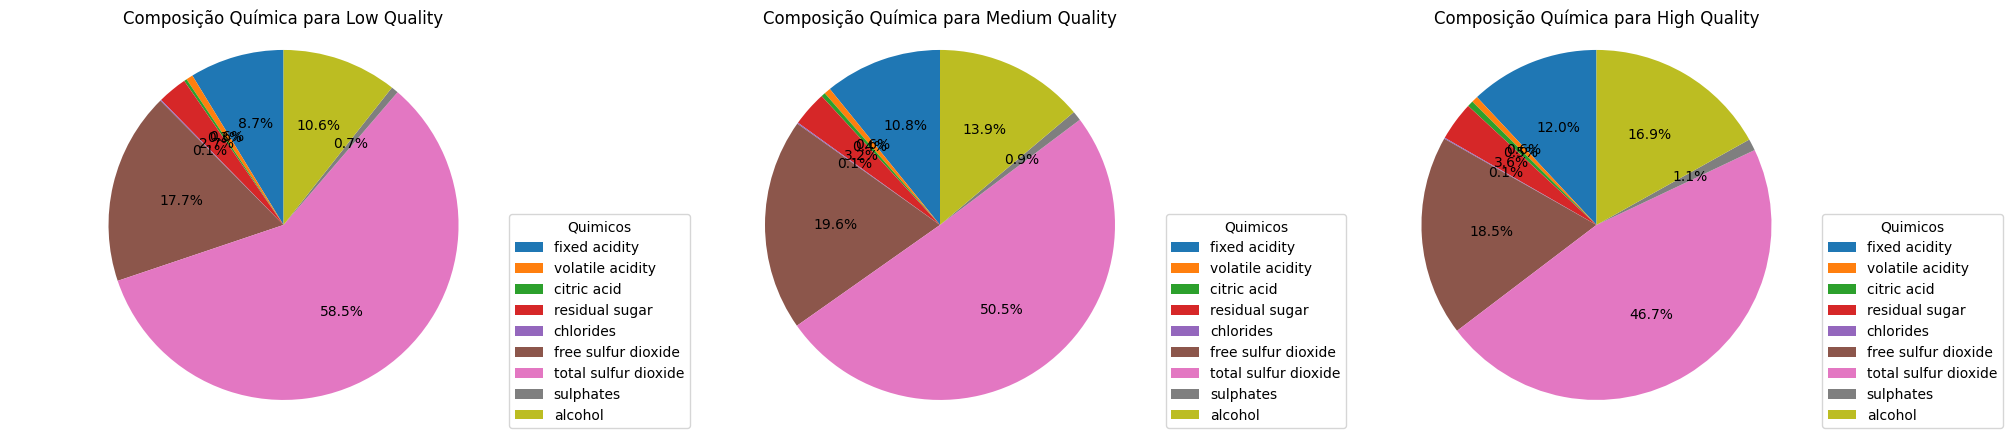

In [7]:

# Cria um Pie Chart para a relação produtos químicos e qualidade (em percentagem)
quimicosColunas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Calcula os valores médios para cada produto químico em cada categoria de qualidade
quimicosMedia = wine.groupby('qualitylabel',observed=True)[quimicosColunas].mean()

fig, axes = plt.subplots(nrows=1, ncols=len(quimicosMedia), figsize=(24, 5))

for ax, quality_category in zip(axes, quimicosMedia.index):
    wedges, texts, autotexts = ax.pie(
        quimicosMedia.loc[quality_category],
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab10.colors
    )
    ax.set_title(f'Composição Química para {quality_category}')
    ax.legend(wedges, quimicosColunas, title="Quimicos", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 0.5))
    ax.axis('equal')


Nos resultados demonstra que quanto menos sulfur dioxide , mais sulphates e mais alchool , o vinho tem mais qualidade.

**Grafico que mostra a importancia de cada quimico por cada Categoria de Qualidade**

Aqui é demonstrado melhor os resultados de anteriormente onde demonstra em relacao de 100 percentagem a seua importancia

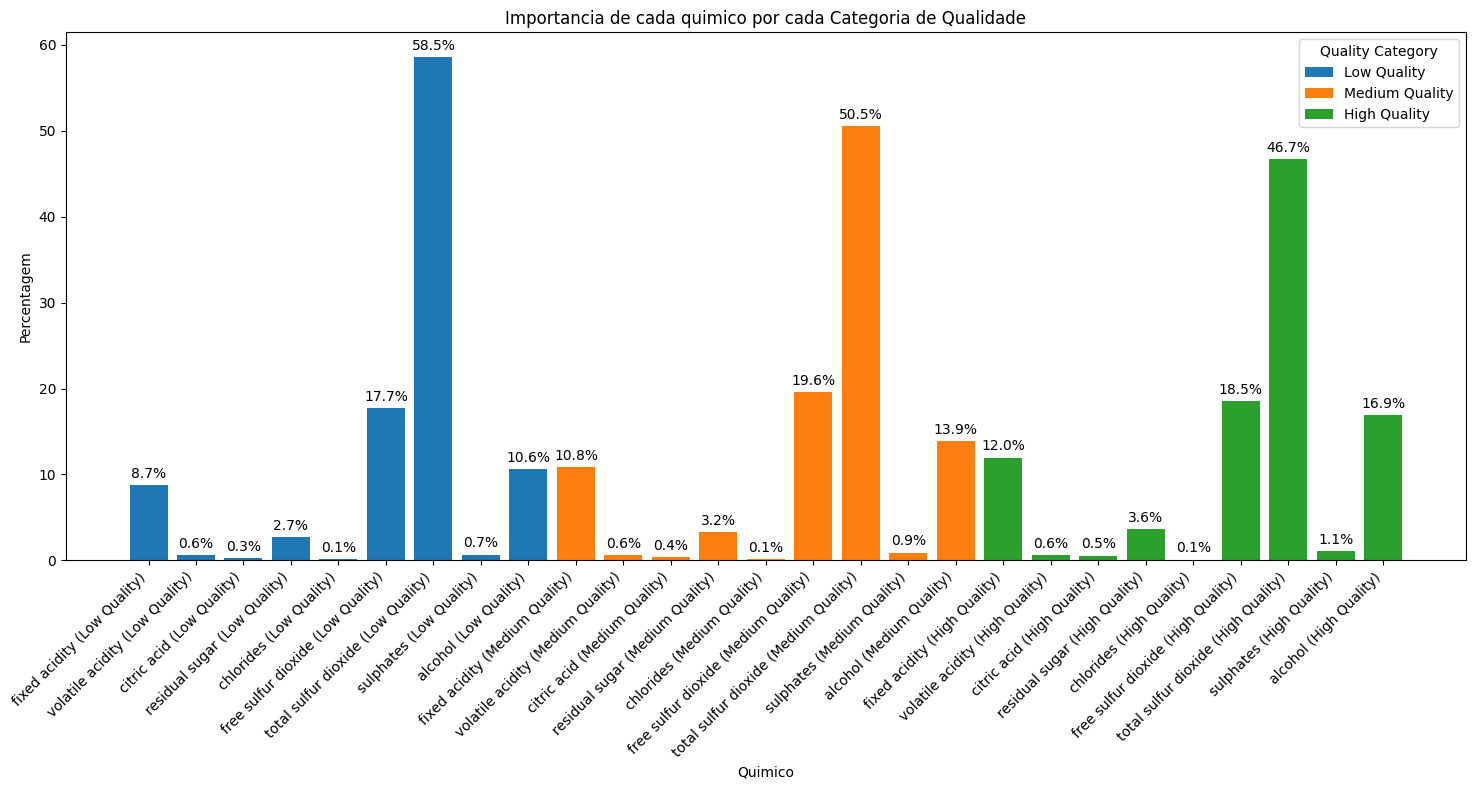

In [8]:
plt.figure(figsize=(15, 8))

#Grafico que mostra a importancia de cada quimico por cada Categoria de Qualidade
for i, quality_category in enumerate(quimicosMedia.index):
    # Calcule a percentagem de cada produto químico
    total = quimicosMedia.loc[quality_category].sum()
    percent = (quimicosMedia.loc[quality_category] / total) * 100

    # Grafico de Barras para a importancia
    bars = plt.bar(
        x=[chem + f" ({quality_category})" for chem in quimicosMedia.columns],
        height=percent,
        color=plt.cm.tab10.colors[i],
        label=quality_category
    )

    # Adiciona as percentagens acima das Barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.title('Importancia de cada quimico por cada Categoria de Qualidade')
plt.xlabel('Quimico')
plt.ylabel('Percentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quality Category', loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Correlação entre pH e Quality**

Fiz a correlacao de pH e Qualidade , onde demonstra que nao ha nehuma relacao

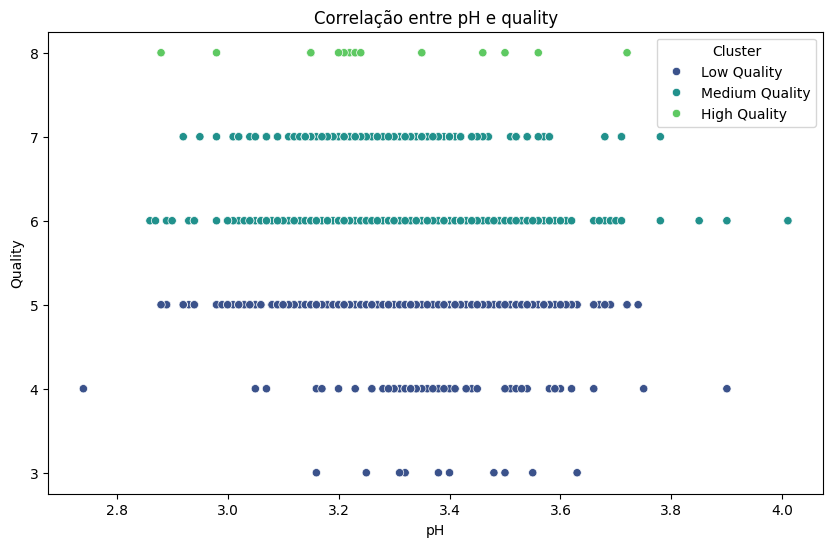

In [9]:
# Scatter plot para a correlação entre pH e Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='quality', data=wine, hue='qualitylabel', palette='viridis')
plt.title('Correlação entre pH e quality')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.legend(title='Cluster', loc='upper right')


**Correlação entre alcohol e Quality**

Fiz a correlacao de alcohol e Quality , onde demonstra que quanto mais alchool mais qualidade tem.

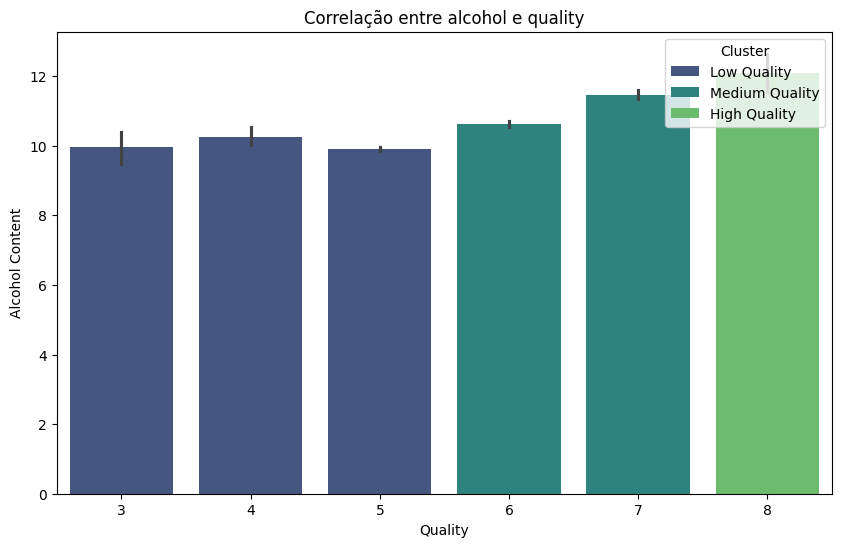

In [10]:
# Scatter plot para a correlação entre alcohol e Quality
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine, hue='qualitylabel', palette='viridis')
plt.title('Correlação entre alcohol e quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# *Conclusao/Análise*


Com a analise que fiz , eu demonstrei as varias percentagens de quimicos nos vinhos presentes e a sua respetiva importancia para a qualidade. 

Os Resultados obtido foi o químico mais presente no vinho é o sulffur dioxide, mas ao decorrer da análise foi descoberto que quanto menos sulffur dioxide , mais sulphates e mais alchool, o vinho tem mais qualidade. Ou seja, para futuras vinheiras controlar esses químicos no seu respetivo vinho é extremamente importante para a qualidade.

No final fiz uma exploracao e confirmacao se o pH afetava a qualidade , onde foi descoberto que não , e a confirmacao se afinal o alchool afetava a qualidade, e foi descoberto que sim.

Concluindo, nesta exploração de quimicos de vinhos eu descobri que todos esses tem influencia para a sua qualidade , mas os mais importantes de estar atento como produtor é o sulffur dioxide , sulphates e percentagem de alchool.

# **Apriori Problema**

Utilizando o algoritmo Apriori eu tive como objetivo descobrir o melhor Pais , e a sua melhor variedade, em termos de producao de vinho para começar uma vinheira. Para isso eu implementei um dataset de uma revista prestegiosa de reviews de vinho "winemag-data.csv" , onde irei descobrir que pais e variedade os somelieres (tasters) preferem , para ajudar a minha vinheira suceder financeiramente.

**Import**

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

**Load do dataset , Limpeza e Selecao de colunas Relevantes**

In [12]:
# File path
file_path = "../wine_database/winemag-data.csv"

# Load do dataset
wine_data = pd.read_csv(file_path)

# Seleciona as colunas relevantes
wine_data = wine_data[['id', 'country', 'winery', 'variety', 'province', 'points', 'taster_name']]

# Remove linhas com valores nulos
wine_data = wine_data.dropna()

**Demonstracao de cada media dos paises com base de pontos**

Aqui demonstro usando EDA (Exploratory Data Analysis) onde demonstro a media de pais usando os 10 melhores vinhos de cada como base em pontos.

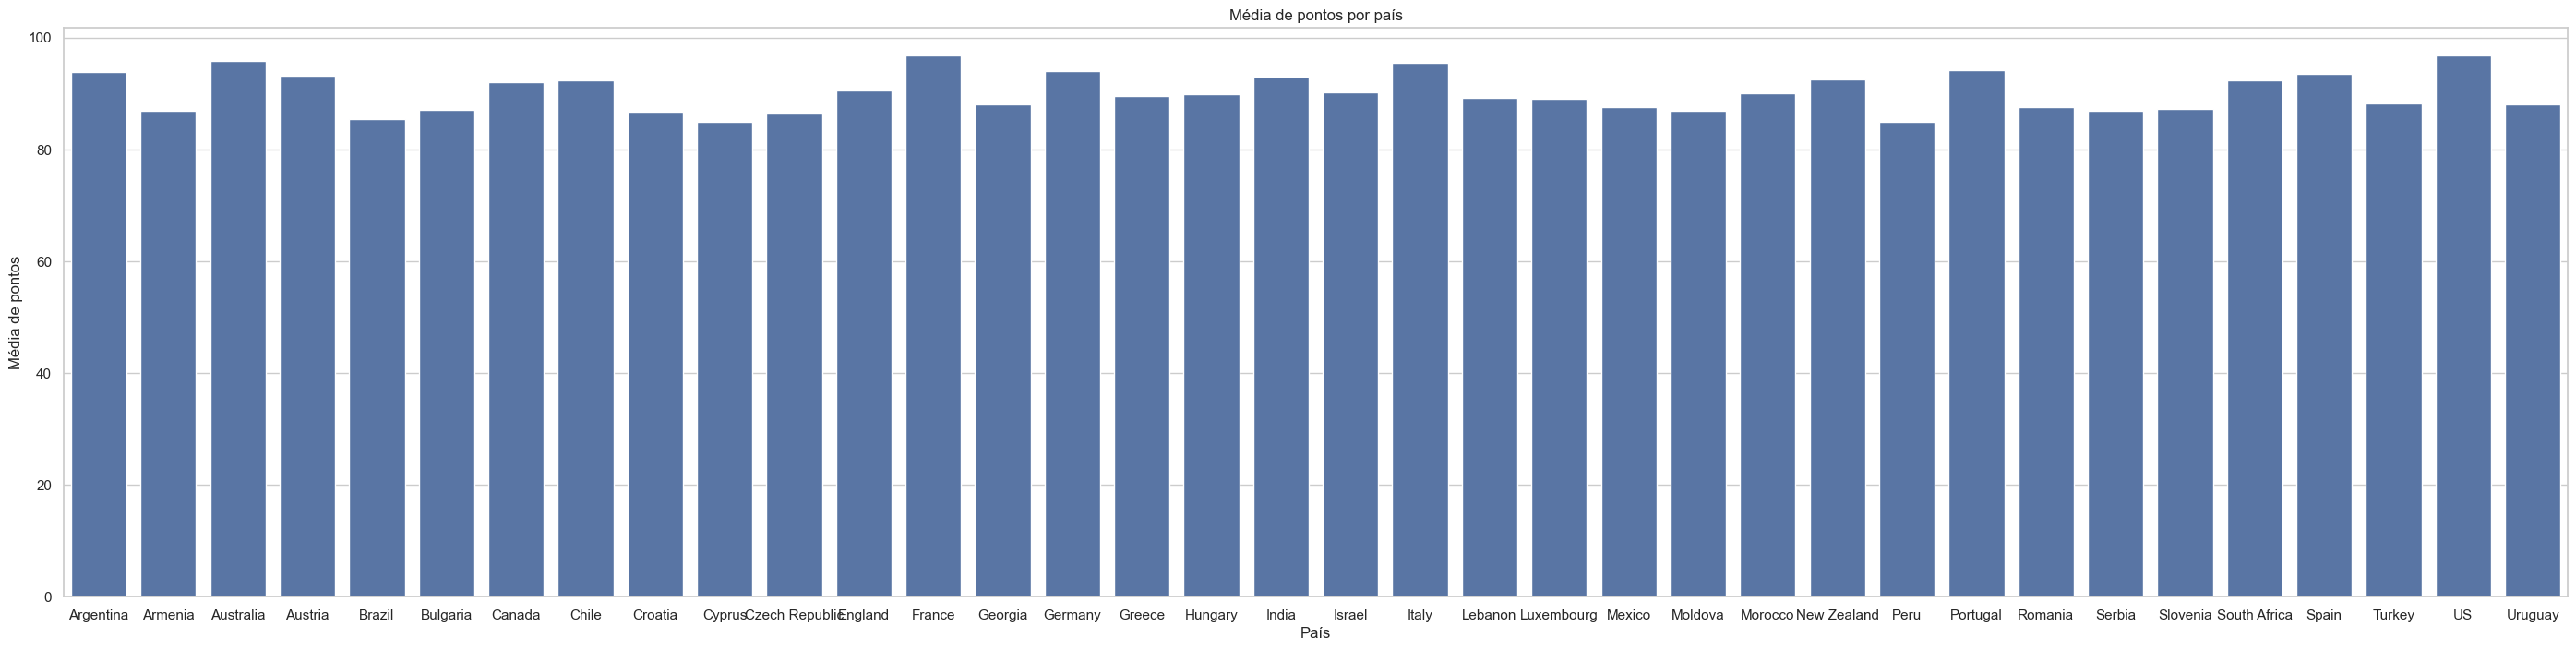

In [13]:
def edaPaises(wine_data):
    # Agrupa os dados por país e encontra os 10 melhores vinhos com base em pontos
    topCountry = wine_data.groupby('country').apply(lambda x: x.nlargest(10, 'points')).reset_index(drop=True)

    sns.set(style="whitegrid")

    # Grafico
    plt.figure(figsize=(35, 8))
    sns.barplot(x='country', y='points', data=topCountry, errorbar=None)
    plt.title('Média de pontos por país')
    plt.xlabel('País')
    plt.ylabel('Média de pontos')
    plt.show()


edaPaises(wine_data)

**Apriori Association Analysis**

Para obter o melhor país , primeiro obti o pais que aparece mais na magazine usando Apriori Algorithm. Primeiro agrupei por pais e pontos , a contar os ids das reviews, depois fiz uma pivot table a usar como index os pontos e como colunas o pais, logo de seguida implementei o apriori algorthm com min support the 0.3 (30%) , e apliquei as regras de associacao com min support de 0.5 (50%)

In [14]:
def aprioriAssociation(wine_data):
    # Agrupar por country and points, counta as ocurrencias dos id das reviews (o numero das reviews)
    wineGrouped = wine_data.groupby(['country', 'points'], as_index=False).agg({'id': 'count'})
    print(wineGrouped)

    # Cria uma Pivot table
    pivot = pd.pivot_table(wineGrouped, index='points', columns=['country'], values='id', fill_value=0)
    pivot = pivot.map(lambda x: True if x > 0 else False)
    print(pivot)

    # Aplica Apriori algorithm
    freqItems = apriori(pivot, min_support=0.3, use_colnames=True)
    print(freqItems)

    # Gera regras de associação
    rules = association_rules(freqItems, metric="support", min_threshold=0.5)
    print(rules.head())

    # Exiba as regras
    print("Association Rules:")
    print(rules)

    return rules

def melhorPaisAssociaciado(rules):
    # Filtra as regras de associação positiva
    posRules = rules[rules['lift'] > 1]

    # Calcula o support total para cada antecedente
    paisSupp = posRules.groupby('antecedents')['support'].sum()

    # Identifica o país com maior apoio total 
    melhorPais = paisSupp.idxmax()

    return melhorPais


# Apriori Association Analysis
rules = aprioriAssociation(wine_data)

# Obtenha o melhor país com base nas association rules
paisMaisAssociado = melhorPaisAssociaciado(rules)
print(f"O país com mais vinhos nesta magazine com base nas regras da associação é: {paisMaisAssociado}")

       country  points  id
0    Argentina      80   7
1    Argentina      81   6
2    Argentina      82   9
3    Argentina      83  27
4    Argentina      84  27
..         ...     ...  ..
243         US      98   2
244         US      99   1
245    Uruguay      86   2
246    Uruguay      88   1
247    Uruguay      90   2

[248 rows x 3 columns]
country  Argentina  Armenia  Australia  Austria  Brazil  Bulgaria  Canada  \
points                                                                      
80            True    False      False    False   False     False   False   
81            True    False      False    False   False     False   False   
82            True    False       True    False   False     False   False   
83            True    False       True    False    True      True    True   
84            True    False       True    False   False     False   False   
85            True    False       True     True   False     False   False   
86            True    False       Tr

**Funcao para obter o país com os melhores vinhos**

Para obter os melhores vinhos , primeiro filtrei os que tinham so mais de 90 pontos , e depois apliquei a regra o Apriori algorithm onde deu o pais que mais aparece nas top reviews (mais de 90 pontos) , sendo assim o pais com melhores vinhos.

In [15]:
def melhorPais90Pontos(wine_data):
  
    # Filtra vinhos com pelo menos 90 pontos
    vinhosHighScored = wine_data[wine_data['points'] >= 90]

    # Obtenha países unicos do dataset 
    paises90 = vinhosHighScored['country'].unique()
    print("Países com pelo menos um vinho com pontuação de 90 pontos ou mais:")
    print(paises90)


    return vinhosHighScored


# Obtenha países com pelo menos um vinho com pontuação de 90 pontos ou mais
paises90 = melhorPais90Pontos(wine_data)
rules = aprioriAssociation(paises90)

melhorPais = melhorPaisAssociaciado(rules)
print(f"O país com os melhores vinhos é: {melhorPais}")

Países com pelo menos um vinho com pontuação de 90 pontos ou mais:
['Australia' 'South Africa' 'France' 'US' 'Germany' 'Portugal' 'Spain'
 'Italy' 'Chile' 'Israel' 'Hungary' 'Argentina' 'Austria' 'Canada'
 'New Zealand' 'Greece' 'England' 'Lebanon' 'Romania' 'Uruguay' 'Morocco'
 'India' 'Turkey' 'Bulgaria']
      country  points  id
0   Argentina      90  23
1   Argentina      91  13
2   Argentina      92   7
3   Argentina      93   8
4   Argentina      94   7
..        ...     ...  ..
95         US      96   9
96         US      97   2
97         US      98   2
98         US      99   1
99    Uruguay      90   2

[100 rows x 3 columns]
country  Argentina  Australia  Austria  Bulgaria  Canada  Chile  England  \
points                                                                     
90            True       True     True      True    True   True     True   
91            True       True     True     False    True   True     True   
92            True       True     True     False   

**Funcao que recomenda de Paises similhares a um selecionado (Neste Caso França)**

Agora que sei que o melhor pais de vinhos é França , eu fiz uma funcao de recomendacao de paises similhares a franca , para dar mais opcao de escolha caso o negocio nao de em França.

In [16]:
def recomendacaoPaisSimilhar(rules, pais, wineData, rec_count):
    paisPontosMedia = wineData[wineData['country'] == pais]['points'].mean()

    sort = rules.sort_values('lift', ascending=False)
    paisRecomendados = []

    for i, rule in sort['antecedents'].items():
        for j in list(rule):
            if j == pais:
                paisRecomendados.append((list(sort.iloc[i]['consequents']), sort.iloc[i]['lift']))

    paisRecomendados = [(country, lift) for country_list, lift in paisRecomendados for country in country_list]
    paisRecomendados = list(set(paisRecomendados))
    
    # Filtra os países recomendados com base em pontos semelhantes e pontos médios mais altos do que o target country
    paisesSimilhar = [
        country for country, _ in sorted(paisRecomendados, key=lambda x: x[1], reverse=True)
        if wineData[wineData['country'] == country]['points'].mean() > paisPontosMedia
    ]
    
    return paisesSimilhar[:rec_count]



# Recomendacao de Paises similhares a France
paisSelec = 'France'
paisRecomendado = recomendacaoPaisSimilhar(rules, paisSelec, wine_data, rec_count=3)
print(f'\nPais: {paisSelec}')
print(f'Países recomendados: {paisRecomendado}')


Pais: France
Países recomendados: ['US', 'Italy', 'Germany']


**Apriori Association Analysis - De Tasters , e seleção da variedade de vinho mais escolhido por pais (em base dos Tasters)**

Agora para descobrir o tipo de vinho de um respetivo pais que os reviewers (tasters) gostam mais eu tive de implementar outro Apriori Algorithm com a diferença no grouping e pivot table , onde agora nos agrupamos por variedade e taster. Tambem ira mostrar um grafico que mostra a quantidade de variedades de vinho desse pais.

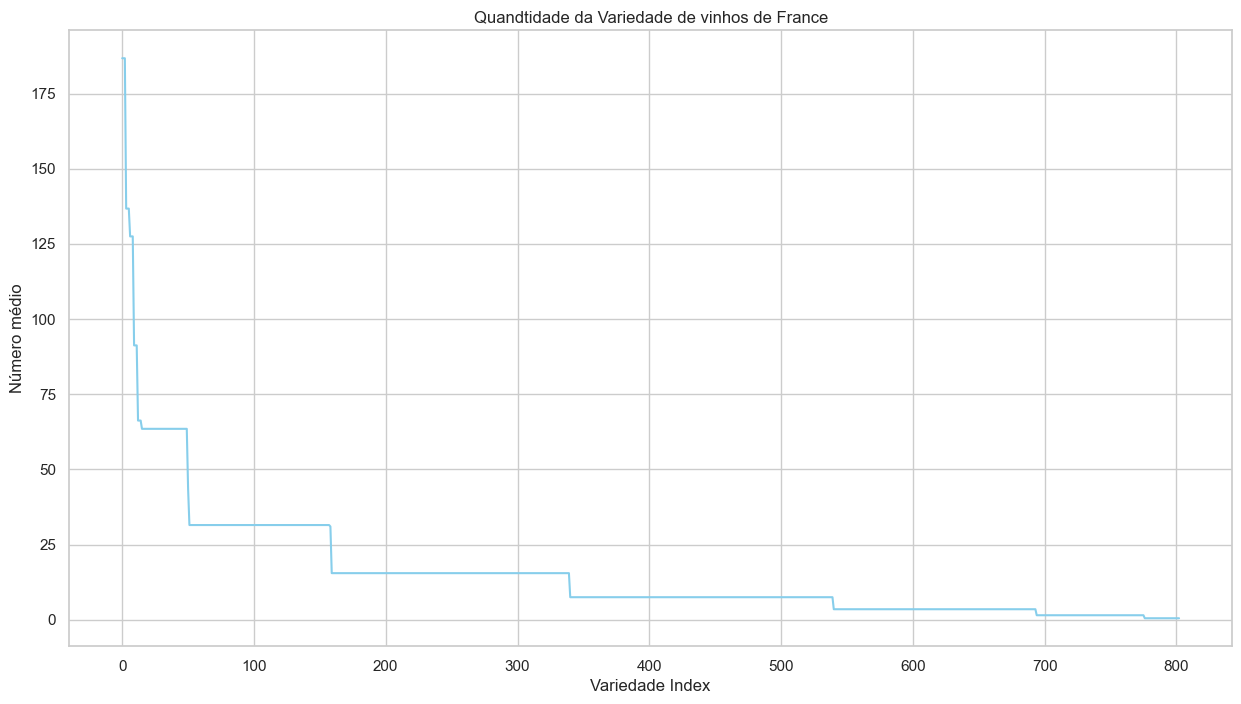

Os vinhos mais escolhidos na France por taste reviewers são: [frozenset({'Pinot Noir'}), frozenset({'Sparkling Blend'}), frozenset({'Red Blend'})]


In [17]:
def aprioriTastersFavoritos(wineData, pais):
    # Filtra o dados para o pais especifico
    paisData = wineData[wineData['country'] == pais]

    # Agrupa por variety e taster, e conta as occurencias de cada id da review
    variedadesTasterGrouped = paisData.groupby(['variety', 'taster_name'], as_index=False).agg({'id': 'count'})

    # Cria uma Pivot table
    pivot = pd.pivot_table(variedadesTasterGrouped, index='taster_name', columns=['variety'], values='id', fill_value=0)
    pivot = pivot.map(lambda x: True if x > 0 else False)

    # Aplica Apriori algorithm
    freqItems = apriori(pivot, min_support=0.3, use_colnames=True)

    # Gera regras de associação
    rules = association_rules(freqItems, metric="support", min_threshold=0.5)

    # Filtra as regras de associação positiva
    posRules = rules[rules['lift'] > 1]

    # Calcula o support total para cada antecedente
    varietySupp = posRules.groupby('antecedents')['support'].sum()

    sortVariety = varietySupp.sort_values(ascending=False)

    plt.figure(figsize=(15, 8))
    sns.lineplot(x=range(len(sortVariety)), y=sortVariety.values, color='skyblue')
    plt.title(f'Quandtidade da Variedade de vinhos de {pais}')
    plt.xlabel('Variedade Index')
    plt.ylabel('Número médio')
    plt.show()

    # Identifique o vinho mais escolhido
    maisEscolhido = sortVariety.max()
    maisEscolhidoLista = sortVariety[sortVariety == maisEscolhido].index.tolist()

    return maisEscolhidoLista




# Escolhe o vinho mais escolhido por pais (France neste exemplo) pelos taste reviewers 
paisSelec = 'France'
vinhosMaisEscolhidos = aprioriTastersFavoritos(wine_data, paisSelec)
print(f"Os vinhos mais escolhidos na {paisSelec} por taste reviewers são: {vinhosMaisEscolhidos}")

# *Conclusao/Análise*


Com a analise que fiz , eu demonstrei que França é o pais ideal para produção de vinho , e que as variedades de vinho que devo produzir sao Sparkling Blend, Pinot Noir e Red Blend.

As varias funções que implementei ajudam a descobrir e recomendar outros aspetos , tal como a melhor variedade de vinho , recomendação de outros paises semelhantes e demonstra os melhores paises em termos de media de pontos.

Concluindo , esta analise ajuda a descobrir tudo o que é necessario para começares uma vinheira , desde variedade e paises. Com todas estas informaçaoes , as chances de a minha vinheira suceder aumentaram consideravelmente.

